# Проект "Анализ маркетинговых показателей Яндекс.Афиши"

Цель проекта: проанализировать источники трафика, выявить невыгодные и перераспределить бюджет.

## Предобработка данных.


Загрузим библиотеки и датасеты.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

Внимательно изучим датасеты.

In [3]:
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [5]:
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Проверим на повторы.

In [6]:
visits.isna().sum()

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

In [7]:
orders.isna().sum()

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

In [8]:
costs.isna().sum()

source_id    0
dt           0
costs        0
dtype: int64

Пропусков и повторов нет, но нужно изменить тип данных некоторых столбцов и поменять их названия.

In [9]:
visits.set_axis(['device', 'end_ts', 'source_id', 'start_ts', 'uid'], axis = 'columns', inplace = True)
orders.set_axis(['buy_ts', 'revenue', 'uid'], axis = 'columns', inplace = True)

visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

Проверим, что получилось.

In [10]:
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
end_ts       359400 non-null datetime64[ns]
source_id    359400 non-null int64
start_ts     359400 non-null datetime64[ns]
uid          359400 non-null uint64
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


,device,end_ts,source_id,start_ts,uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [11]:
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
buy_ts     50415 non-null datetime64[ns]
revenue    50415 non-null float64
uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


,buy_ts,revenue,uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [12]:
costs.info()
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


Всё отлично, двигаемся дальше.


## Расчёт метрик.

Наша задача - посчитать три метрики: продуктовую, электронной коммерции и маркетинговую. Также нужно построить графики к каждой.

### Продуктовая метрика.

#### Рассчитаем DAU, WAU и MAU. Вычислим средние значения этих метрик за весь период и отобразим изменения метрик во времени на графиках.

Создадим новые столбцы в датасете visits и приведём их к типу datetime.

In [13]:
visits['session_year'] = visits['start_ts'].astype('datetime64[Y]')
visits['session_month'] = visits['start_ts'].astype('datetime64[M]')
visits['session_week'] = visits['start_ts'].astype('datetime64[W]')
visits['session_date'] = visits['start_ts'].dt.date
visits.info()
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 9 columns):
device           359400 non-null object
end_ts           359400 non-null datetime64[ns]
source_id        359400 non-null int64
start_ts         359400 non-null datetime64[ns]
uid              359400 non-null uint64
session_year     359400 non-null datetime64[ns]
session_month    359400 non-null datetime64[ns]
session_week     359400 non-null datetime64[ns]
session_date     359400 non-null object
dtypes: datetime64[ns](5), int64(1), object(2), uint64(1)
memory usage: 24.7+ MB


,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-01-01,2017-12-01,2017-12-21,2017-12-27


Рассчитаем по новым столбцам необходимые нам метрики и выведем их среднее значение.

In [14]:
dau_total = visits.groupby('session_date').agg({'uid': 'nunique'})
wau_total = visits.groupby('session_week').agg({'uid': 'nunique'})
mau_total = visits.groupby('session_month').agg({'uid': 'nunique'})

In [15]:
print('Среднее количество уникальных пользователей в день:', int(dau_total.mean()))
print('Среднее количество уникальных пользователей в неделю:', int(wau_total.mean()))
print('Среднее количество уникальных пользователей в месяц:', int(mau_total.mean()))

Среднее количество уникальных пользователей в день: 907
Среднее количество уникальных пользователей в неделю: 5724
Среднее количество уникальных пользователей в месяц: 23228


Мы вычислили среднее кол-во уникальных пользователей. Сформируем графики, отображающие кол-во уникальных пользователей в день, неделю и месяц.

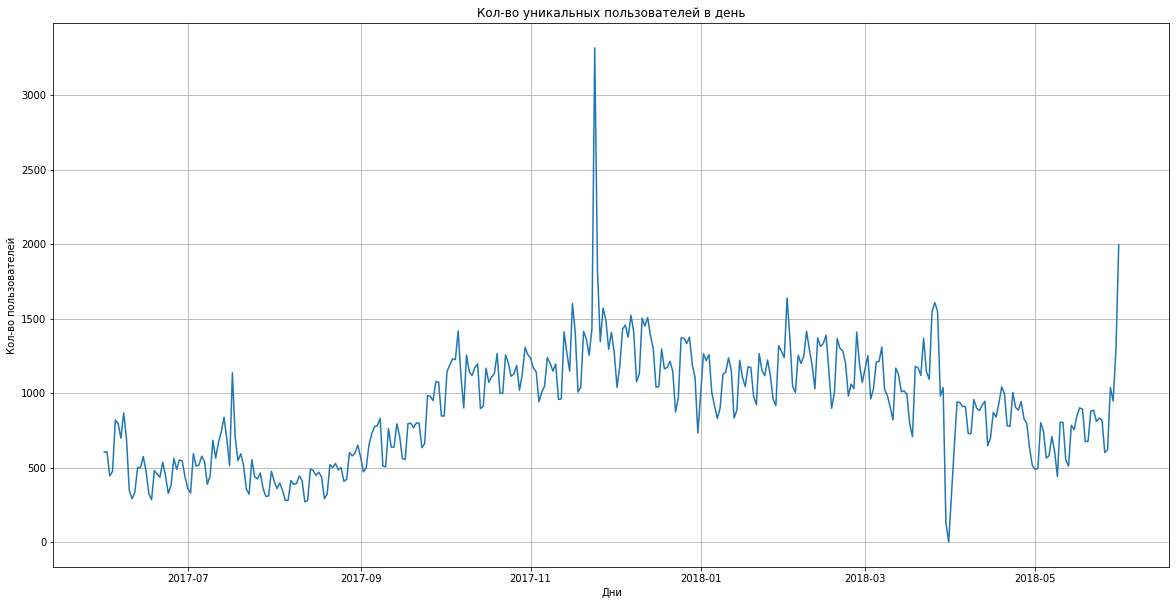

In [16]:
plt.figure(figsize=(20, 10))
sns.lineplot(data = dau_total.reset_index(), x='session_date', y='uid')
plt.title('Кол-во уникальных пользователей в день')
plt.xlabel('Дни')
plt.ylabel('Кол-во пользователей')
plt.grid()
plt.show()

На протяжении всего периода график распределяется более-менее равномерно. Обращают на себя два сильных колебания. Первое - незадолго до нового 2018 года. Очевидно, это были предновогодние покупки. Второе - в апреле 2018 года, когда кол-во пользователей резко упало до нуля. Следует проверить, не было ли технических неполадок с сайтом в этот день.

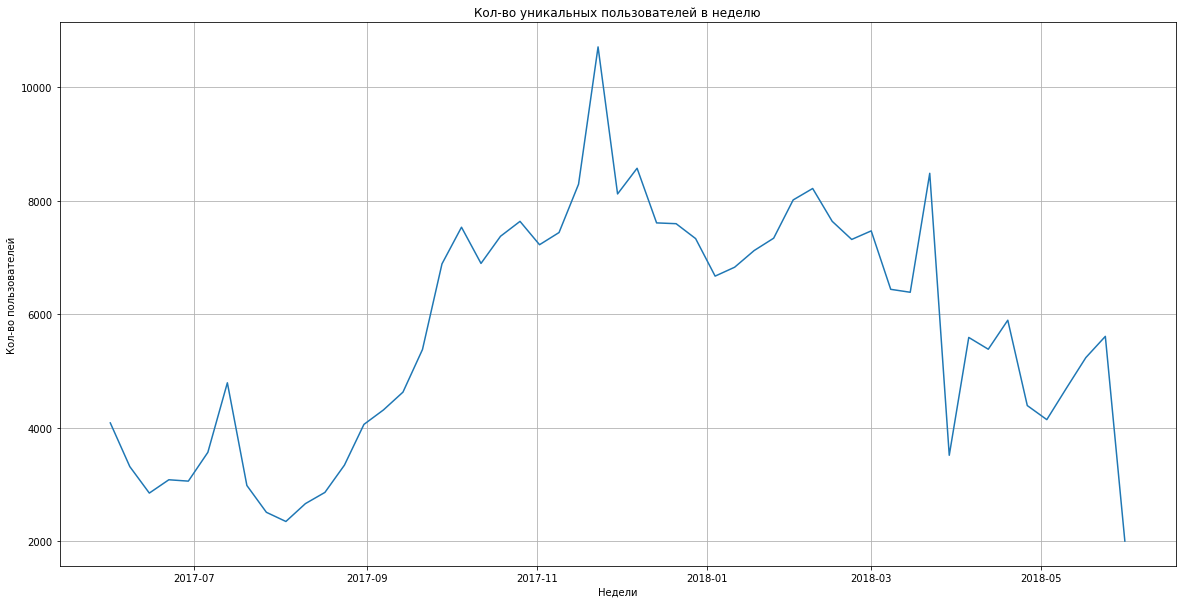

In [17]:
plt.figure(figsize=(20, 10))
sns.lineplot(data = wau_total.reset_index(), x='session_week', y='uid')
plt.title('Кол-во уникальных пользователей в неделю')
plt.xlabel('Недели')
plt.ylabel('Кол-во пользователей')
plt.grid()
plt.show()

График сильно напоминает предыдущий. Мы также видим резкий предновогодний пик и такое же резкое падение вниз.

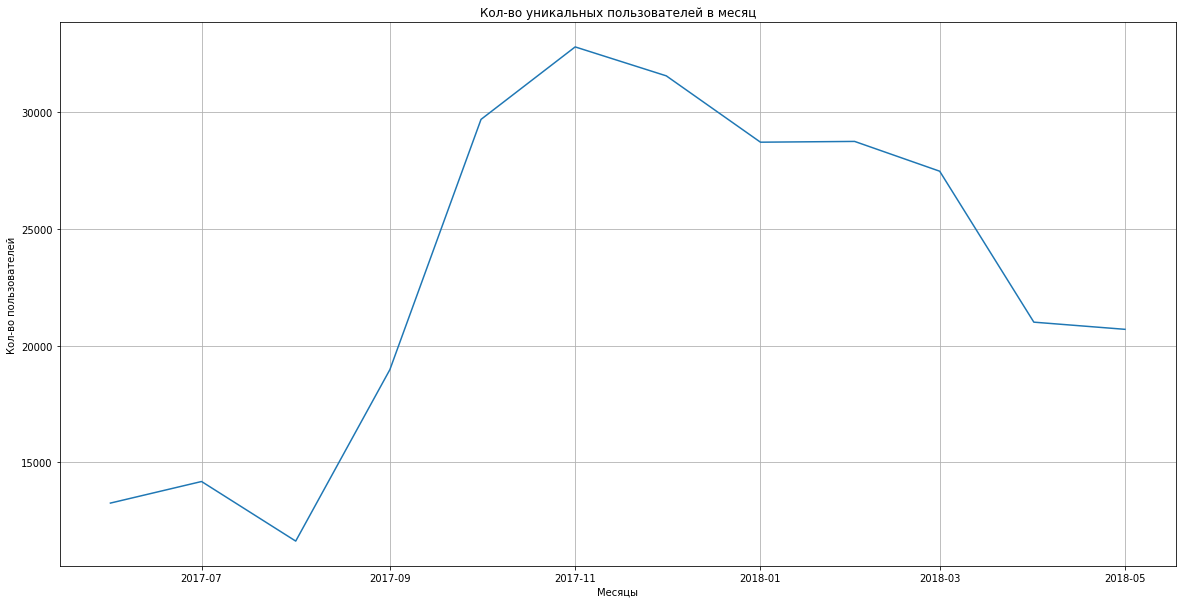

In [18]:
plt.figure(figsize=(20, 10))
sns.lineplot(data = mau_total.reset_index(), x='session_month', y='uid')
plt.title('Кол-во уникальных пользователей в месяц')
plt.xlabel('Месяцы')
plt.ylabel('Кол-во пользователей')
plt.grid()
plt.show()

Как и следовало ожидать, график предстаёт нам более плавным. Но серьёзному анализу его подвергать не стоит: месяц - не самый лучший отрезок времени для измерения посещений. "Аномалии", которые показывали предудщие графики, этот график скрывает. Если бы мы исследовали длительный период (например, несколько лет), месяцы можно было бы использовать, а в нашем случае такая метрика не слишком информативна.

#### Определим, сколько раз за день пользователи в среднем заходят на сайт. Построим график, отражающий изменения метрики во времени.

Сгруппируем таблицу с посещениями по дате и пользователям с методом count и найдём среднее количество сессий.

In [19]:
count_users_per_day = visits.groupby('session_date').agg({'uid': 'count'})
mean_users_per_day = count_users_per_day / dau_total
print('В среднем пользователи заходят на сайт:', int(mean_users_per_day.mean()), 'раз.')

В среднем пользователи заходят на сайт: 1 раз.


Построим график с динамикой пользовательских сессий.

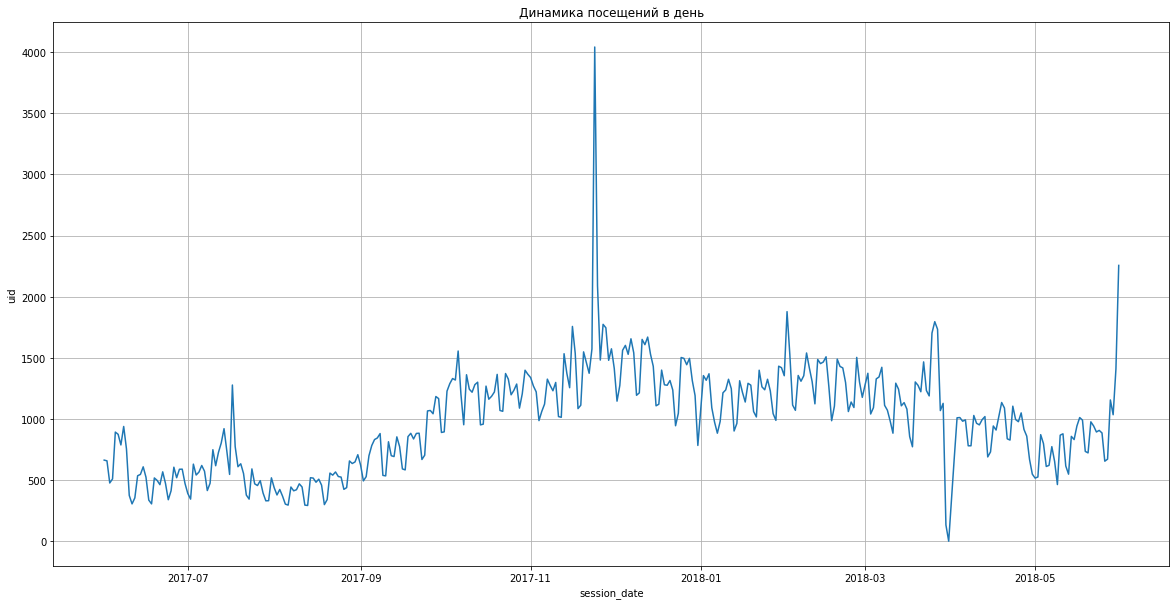

In [20]:
plt.figure(figsize=(20, 10))
sns.lineplot(data = count_users_per_day.reset_index(), x='session_date', y='uid')
plt.title('Динамика посещений в день')
plt.grid()
plt.show()

График сильно напоминает один из предыдущих: "Кол-во уникальных пользователей в день", и отражает ту же динамику: в основном всё ровно, но есть две "аномалии".

#### Исследуем, сколько времени пользователи проводят на сайте. Узнаем продолжительность типичной пользовательской сессии за весь период. Чтобы выбрать подходящую среднюю меру, построим график распределения.

Вычислим необходимые нам данные в секундах и построим график.

In [21]:
visits['session_duration_sec'] = (visits['end_ts'] - visits['start_ts']).dt.seconds
print(visits['session_duration_sec'].mean()) 

643.506488592098


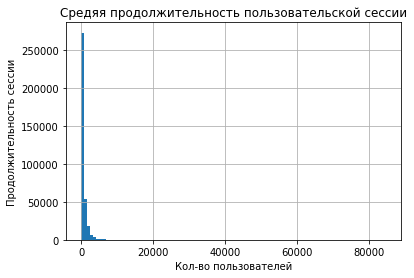

In [22]:
visits['session_duration_sec'].hist(bins=100)
plt.xlabel('Кол-во пользователей')
plt.ylabel('Продолжительность сессии')
plt.title('Средяя продолжительность пользовательской сессии')
plt.show()

Мы видим, что распределение далеко от нормального. Мы не сможем использовать ни среднее значение, ни медиану, поэтому возьмём моду. 

In [23]:
visits['session_duration_sec'].mode()

0    60
dtype: int64

Вывод очевиден: средняя продолжительность пользования сайтом составляет всего минуту. Очевидно, что это мало. Следует выяснить, в чём дело: может, в некорректном или просто неудобном отображении на смартфоне?

#### Рассчитаем Retention Rate, применяя когортный анализ, отразим изменения метрики во времени на графике. Затем найдём средний Retention Rate на второй месяц «жизни» когорт.

Создадим, используя таблицу visits, новую таблицу, в которой будут отражены первые пользовательские сессии каждого пользователя.

In [24]:
first_activity = visits.groupby('uid').agg({'start_ts': 'min'}).reset_index()
first_activity.columns = ['uid', 'first_start_ts']
first_activity.head()

,uid,first_start_ts
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


Создадим два столбца first_start_dt и first_start_month и приведём их к типу данных datetime.

In [25]:
first_activity['first_start_dt'] = first_activity['first_start_ts'].dt.date
first_activity['first_start_month'] = first_activity['first_start_ts'].astype('datetime64[M]')
first_activity.head()

,uid,first_start_ts,first_start_dt,first_start_month
0,11863502262781,2018-03-01 17:27:00,2018-03-01,2018-03-01
1,49537067089222,2018-02-06 15:55:00,2018-02-06,2018-02-01
2,297729379853735,2017-06-07 18:47:00,2017-06-07,2017-06-01
3,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01
4,325320750514679,2017-09-30 14:29:00,2017-09-30,2017-09-01


Соединим нашу новую таблицу с уже имеющейся visits.

In [26]:
total_visits = pd.merge(visits, first_activity, on='uid')
total_visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_start_ts,first_start_dt,first_start_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20 17:20:00,2017-12-20,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19 16:53:00,2018-02-19,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09 20:05:00,2018-03-09,2018-03-01
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-01-01,2018-03-01,2018-03-08,2018-03-09,1680,2018-03-09 20:05:00,2018-03-09,2018-03-01


Теперь создадим новый столбец с нумерацией когорт по сроку "жизни".

In [27]:
total_visits['cohort_lifetime'] = total_visits['session_month'] - total_visits['first_start_month']
total_visits['cohort_lifetime'] = total_visits['cohort_lifetime'] / np.timedelta64(1, 'M')
total_visits['cohort_lifetime'] = total_visits['cohort_lifetime'].round().astype('int')    
total_visits.head()

,device,end_ts,source_id,start_ts,uid,session_year,session_month,session_week,session_date,session_duration_sec,first_start_ts,first_start_dt,first_start_month,cohort_lifetime
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-01-01,2017-12-01,2017-12-14,2017-12-20,1080,2017-12-20 17:20:00,2017-12-20,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-01-01,2018-02-01,2018-02-15,2018-02-19,1680,2018-02-19 16:53:00,2018-02-19,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-01-01,2017-07-01,2017-06-29,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-01-01,2018-05-01,2018-05-17,2018-05-20,1440,2018-03-09 20:05:00,2018-03-09,2018-03-01,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-01-01,2018-03-01,2018-03-08,2018-03-09,1680,2018-03-09 20:05:00,2018-03-09,2018-03-01,0


Создадим новую таблицу cohorts, в которой будет информация о когортах и времени их жизни, а затем построим сводную таблицу, в которой будут отображаться показатели retention rate для каждой когорты.

In [28]:
cohorts = total_visits.groupby(['first_start_month','cohort_lifetime']).agg({'uid':'nunique'}).reset_index()
initial_users_count = cohorts[cohorts['cohort_lifetime'] == 0][['first_start_month', 'uid']]
initial_users_count = initial_users_count.rename(columns={'uid':'cohort_users'}) 
cohorts = cohorts.merge(initial_users_count,on='first_start_month') 
cohorts['retention'] = cohorts['uid'] / cohorts['cohort_users'] 
cohorts['first_start_month'] = cohorts['first_start_month'].dt.strftime('%Y-%m')

In [29]:
retention_pivot = cohorts.pivot_table(
    index='first_start_month',
    columns='cohort_lifetime',
    values='retention',
    aggfunc='sum',
)
retention_pivot

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_start_month,,,,,,,,,,,,
2017-06,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Создадим тепловую карту по полученной таблице.

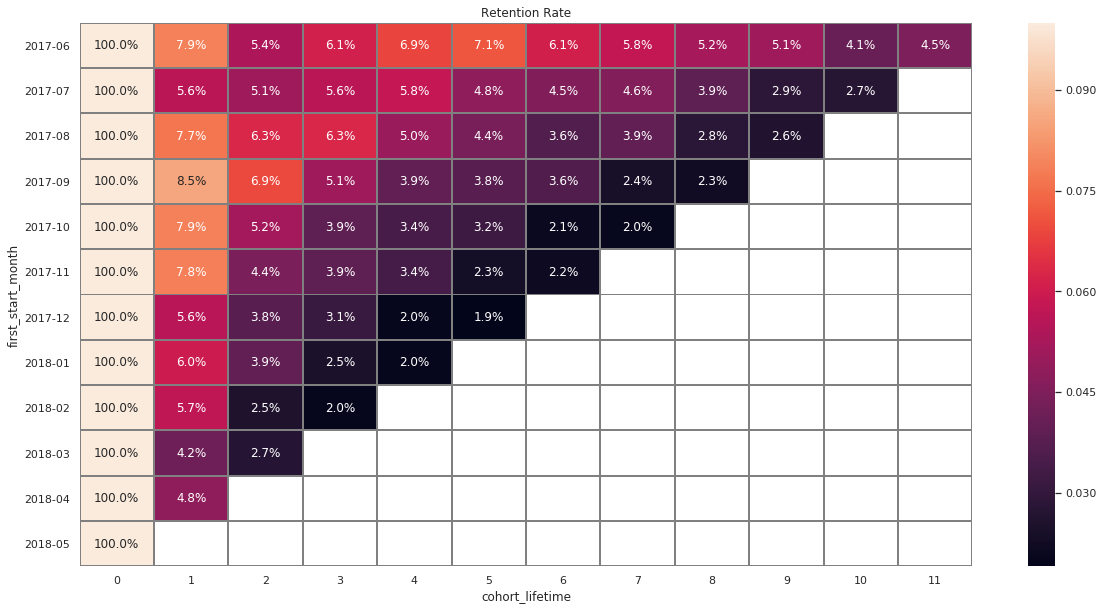

In [30]:
sns.set(style='white')
plt.figure(figsize=(20, 10))
plt.title('Retention Rate')
sns.heatmap(retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax=0.1)
plt.show()

Найдём средний RR по второму месяцу "жизни" которт. 

In [31]:
print('Средний retention rate на 2-м месяце жизни когорт:', float(cohorts.query('cohort_lifetime == 1').agg({'retention': 'mean'})))

Средний retention rate на 2-м месяце жизни когорт: 0.06516659710392834


Итак, таблица показывает нам, что на втором месяце "жизни" когорт показатель RR резко падает - в среднем он составляет всего 6% от первоначального значения. Это говорит о том, что примерно 94% изначальных пользователей "отваливаются" после первого месяца пользования продуктом. Следует сразу же обратить внимание на это обстоятельство. Может, причина в плохой работе сайта? В неудобной навигации? Или в условиях сервиса (к примеру, высокой комиссии)?

### Метрики электронной коммерции.

#### Исследуем, сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки.

Создадим два новых столбца с нужными нам временными показателями.

In [32]:
orders['buy_dt'] = pd.to_datetime(orders['buy_ts'])
orders['buy_month'] = orders['buy_ts'].astype('datetime64[M]')
orders.info()
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 5 columns):
buy_ts       50415 non-null datetime64[ns]
revenue      50415 non-null float64
uid          50415 non-null uint64
buy_dt       50415 non-null datetime64[ns]
buy_month    50415 non-null datetime64[ns]
dtypes: datetime64[ns](3), float64(1), uint64(1)
memory usage: 1.9 MB


,buy_ts,revenue,uid,buy_dt,buy_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:10:00,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:25:00,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:27:00,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:29:00,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:58:00,2017-06-01


Создадим новую таблицу, в которой будут отражены даты первых заказов каждого пользователя.

In [33]:
first_orders = orders.groupby('uid').agg({'buy_ts': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_ts']
first_orders['first_order_dt'] = first_orders['first_order_ts'].dt.date
first_orders['first_order_month'] = first_orders['first_order_ts'].astype('datetime64[M]')

Создадим новую таблицу, в которой будут id пользователей и даты их первых покупок, а также жеты первых пользовательских сессий. Затем вычислим среднее время от первого посещения сайта до покупки и построим график.

In [34]:
buyers = pd.merge(first_activity, first_orders, on='uid')
buyers.info()
buyers.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36523 entries, 0 to 36522
Data columns (total 7 columns):
uid                  36523 non-null uint64
first_start_ts       36523 non-null datetime64[ns]
first_start_dt       36523 non-null object
first_start_month    36523 non-null datetime64[ns]
first_order_ts       36523 non-null datetime64[ns]
first_order_dt       36523 non-null object
first_order_month    36523 non-null datetime64[ns]
dtypes: datetime64[ns](4), object(2), uint64(1)
memory usage: 2.2+ MB


,uid,first_start_ts,first_start_dt,first_start_month,first_order_ts,first_order_dt,first_order_month
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01


In [35]:
buyers['first_start_dt'] = pd.to_datetime(buyers['first_start_dt'])
buyers['first_order_dt'] = pd.to_datetime(buyers['first_order_dt'])
buyers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36523 entries, 0 to 36522
Data columns (total 7 columns):
uid                  36523 non-null uint64
first_start_ts       36523 non-null datetime64[ns]
first_start_dt       36523 non-null datetime64[ns]
first_start_month    36523 non-null datetime64[ns]
first_order_ts       36523 non-null datetime64[ns]
first_order_dt       36523 non-null datetime64[ns]
first_order_month    36523 non-null datetime64[ns]
dtypes: datetime64[ns](6), uint64(1)
memory usage: 2.2 MB


In [36]:
buyers['days_to_first_purchase'] = buyers['first_order_ts'] - buyers['first_start_ts']
buyers['days_to_first_purchase'] = (buyers['days_to_first_purchase'] / np.timedelta64(1, 'D')).round().astype('int')  

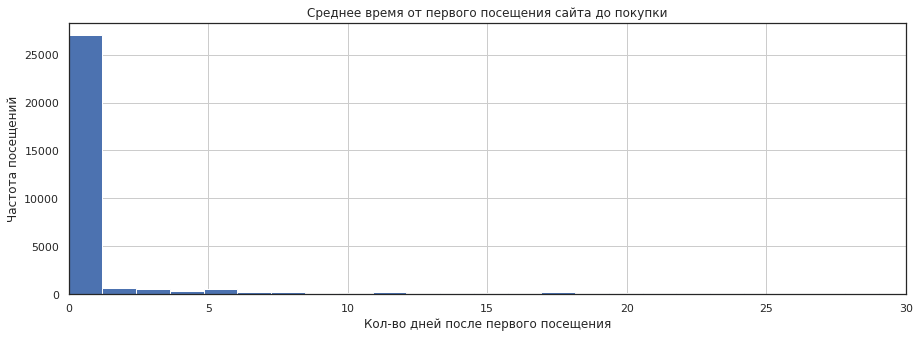

In [37]:
plt.figure(figsize=(15, 5))

buyers['days_to_first_purchase'].plot(kind='hist', bins=300, grid=True)
plt.title('Среднее время от первого посещения сайта до покупки')
plt.xlabel('Кол-во дней после первого посещения')
plt.ylabel('Частота посещений')
plt.xlim(0, 30)
plt.show()

График показывает, что в подавляющем большинстве случаев покупки совершались при первом же посещении.

#### Применяя когортный анализ или другой метод, рассчитайте среднее количество покупок на одного покупателя за определённый период, например за 6 месяцев.

Создадим новую переменную, в которой сохраним полугодовой сред данных по таблице orders. Рассчитаем среднее кол-во покупок на одного покупателя.

In [38]:
order_count = orders[(orders['buy_month'] >= '2018-01-01') & (orders['buy_month'] < '2018-07-01')]
order_count = orders.groupby('uid').agg({'buy_month': 'nunique'}).mean()
print('Среднее кол-во покупок на одного покупателя за полгода составляет:', int(order_count))

Среднее кол-во покупок на одного покупателя за полгода составляет: 1


#### Рассчитаем средний чек, применяя группировку по времени совершения покупки. Построим график, отражающий изменения метрики во времени.

In [39]:
print('Средний чек составляет: {:.2f}, у.е.'.format(orders['revenue'].mean()))

Средний чек составляет: 5.00, у.е.


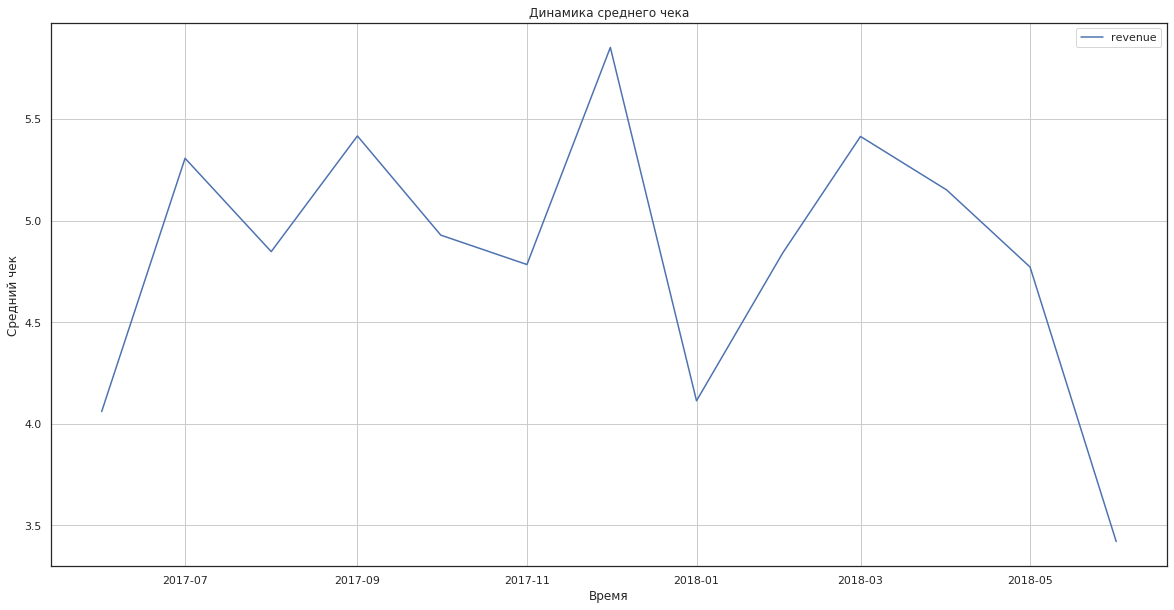

In [40]:
mean_orders = orders.groupby('buy_month').agg({'revenue': 'mean'})
plt.figure(figsize=(20, 10))
sns.lineplot(data = mean_orders)
plt.title('Динамика среднего чека')
plt.xlabel('Время')
plt.ylabel('Средний чек')
plt.grid()
plt.show()

Обращает на себя внимание пик, которого достиг средний чек - это как раз ранее замеченное предновогоднее время. Сразу за ним - резкое падение в первом месяце 2018 года, что вполне закономерно. Затем небольшой рост, связанный, вероятно, с праздниками 23 февраля и 8 марта, затем вновь понижение (возможно, повлияли майские праздники).

#### Выясним, как меняется LTV на покупателя по когортам. Рассчитаем средний LTV по когортам за 6 месяцев.

Воспользуемся для удобства сделанной нами ранее таблицей buyers, в которой уже есть дата первой покупки каждого покупателя. Найдём количество покупателей за каждую дату.

In [41]:
cohort_sizes = buyers.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340
5,2017-11-01,4081
6,2017-12-01,4383
7,2018-01-01,3373
8,2018-02-01,3651
9,2018-03-01,3533


Построим когорты и добавим месяц первой покупки каждого покупателя в таблицу с заказами.

In [42]:
cohorts = pd.merge(orders, buyers, on='uid')
cohorts = (
    cohorts.groupby(['first_order_month', 'buy_month'])
    .agg({'revenue': 'sum'})
    .reset_index()
)
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,buy_month,revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


Найдём LTV и построим сводную таблицу по когортам.

In [43]:
margin_rate = 1

report['gp'] = report['revenue'] * margin_rate
report['age'] = (
    report['buy_month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
report['ltv'] = report['gp'] / report['n_buyers']
report['first_order_month'] = report['first_order_month'].dt.strftime('%Y-%m')
output = report.pivot_table(
    index='first_order_month', columns='age', values='ltv', aggfunc='mean'
)

ltv = output.cumsum(axis=1)
ltv.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,4.724414,5.20974,5.64738,6.60205,7.62458,8.36008,9.31052,9.89212,10.4453,11.0511,11.6224,11.8792
2017-07,6.010218,6.34543,6.96896,7.32794,7.50473,7.66077,7.78098,7.9228,8.08404,8.23118,8.38685,
2017-08,5.276518,5.74851,6.20699,6.59827,7.09232,7.37586,7.58653,7.99153,8.28374,8.47172,,
2017-09,5.644529,6.76212,7.28305,11.2588,11.6594,12.3065,13.0081,13.2512,13.4352,,,
2017-10,5.003733,5.5395,5.73089,5.88803,6.03959,6.15996,6.24477,6.36024,,,,
2017-11,5.154683,5.55392,5.75347,6.07842,6.22644,6.28032,6.39524,,,,,
2017-12,4.738191,4.99856,5.92366,6.98894,7.30187,7.63991,,,,,,
2018-01,4.135636,4.43039,4.73468,4.87745,4.94015,,,,,,,
2018-02,4.156987,4.43526,4.51378,4.58792,,,,,,,,


In [44]:
report['age'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Построим тепловую карту по таблице с LTV.

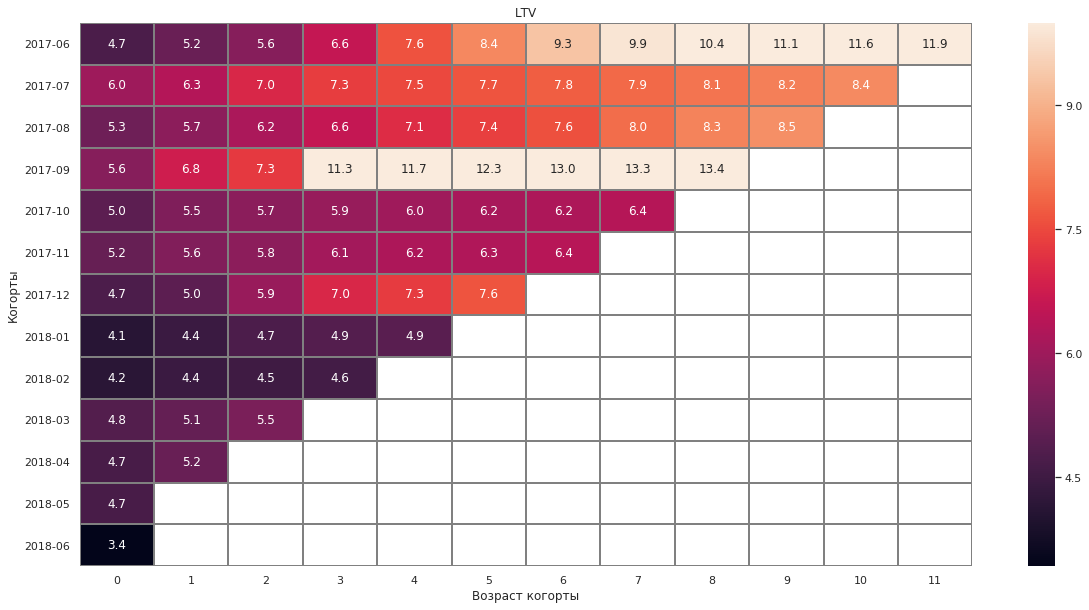

In [45]:
sns.set(style='white')
plt.figure(figsize=(20, 10))
plt.title('LTV')
sns.heatmap(ltv, annot=True, fmt='.1f', linewidths=1, linecolor='gray', vmax=10)
plt.xlabel('Возраст когорты')
plt.ylabel('Когорты')
plt.show()

На четвёртый месяц жизни четвёртой когорты LTV резко возрос. Это декабрь - значит, можно предположить, резкий рост связан с предновогодними покупками. Однако у друзих когорт в тот же период столько резкого роста не наблюдается. Может, была организована акция для четвёртой когорты, которая привлекла покупателей больше, чем обычно. Для остальных когорт картина примерно одинаковая - постепенный рост.


Посчитаем среднее LTV за 6 месяцев.

In [46]:
ltv6 = ltv[5].reset_index().mean()
print('Среднее LTV за полгода: {:.2f}'.format(float(ltv6)))

Среднее LTV за полгода: 7.97


### Маркетинговые метрики.

#### Посчитаем общую сумму расходов на маркетинг и выясним, как траты распределены по источникам.

In [47]:
print('Общая сумма трат на маркетинг:', costs['costs'].sum(), 'у.е.')

Общая сумма трат на маркетинг: 329131.62 у.е.


In [48]:
costs_sum = costs.groupby('source_id')['costs'].sum()

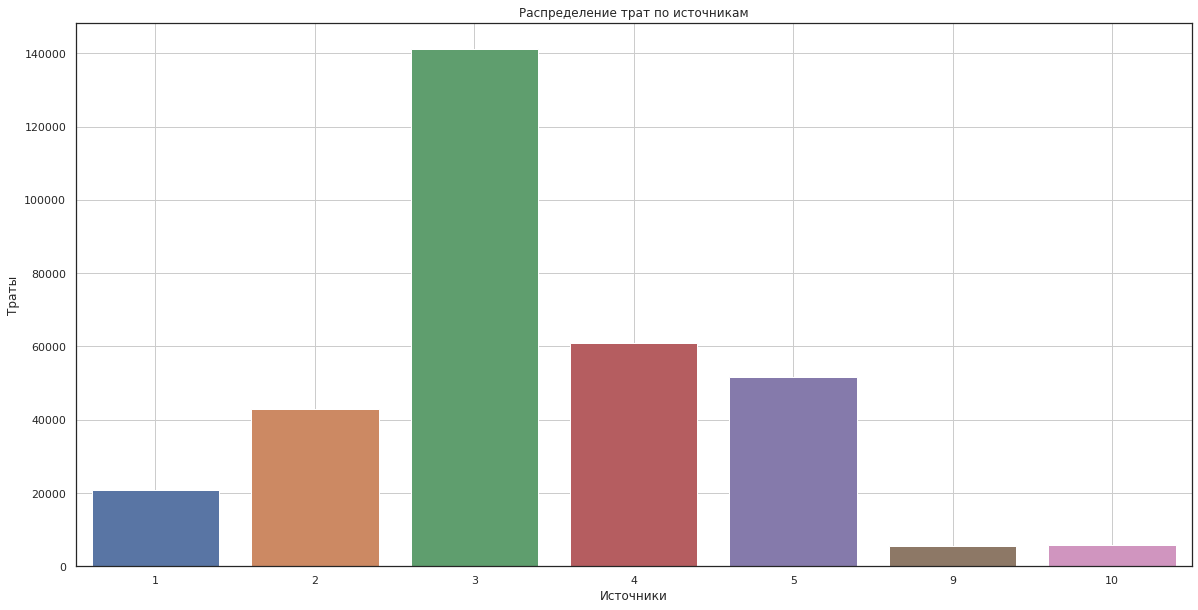

In [49]:
plt.figure(figsize=(20, 10))
sns.barplot(data = costs_sum.reset_index(), x='source_id', y='costs')
plt.title('Распределение трат по источникам')
plt.xlabel('Источники')
plt.ylabel('Траты')
plt.grid()
plt.show()

Больше всего трат на источник №3 - более, чем в 2 раза больше, чем на истоники 4 и 5, и в 2,5 раза больше, чем на источник 2. Ниже посмотрим, насколько оправданы эти траты.

#### Рассчитаем средний CAC на одного покупателя для всего проекта и для каждого источника трафика.

Выявим источник первого посещения.

In [50]:
users = visits.sort_values(by = ['uid', 'start_ts']).groupby('uid').agg({'source_id': 'first'}).reset_index()
users

,uid,source_id
0,11863502262781,3
1,49537067089222,2
2,297729379853735,3
3,313578113262317,2
4,325320750514679,5
...,...,...
228164,18446403737806311543,5
228165,18446424184725333426,4
228166,18446556406699109058,3
228167,18446621818809592527,4


Объединим таблицы buyers и users для дальнейших вычислений. Найдём кол-во пользователей по источникам и дате. Использовать дату, а не месяц, мы будем потому, что это даст более точный результат.

In [51]:
buyers = pd.merge(buyers, users, on='uid')

In [52]:
buyers_per_day = buyers.groupby(['source_id', 'first_order_dt']).agg({'uid': 'nunique'}).reset_index()
buyers_per_day.rename(columns={'uid': 'n_buyers_dt'}, inplace=True)
buyers_per_day['first_order_dt'] = pd.to_datetime(buyers_per_day['first_order_dt'])

In [53]:
costs['costs_month'] = costs['dt'].astype('datetime64[M]')
costs1 = pd.merge(buyers_per_day, costs, left_on=['source_id', 'first_order_dt'], right_on=['source_id', 'dt'])
costs1['cac'] = costs1['costs'] / costs1['n_buyers_dt']

Рассчитаем средний САС.

In [54]:
cac_mean = costs1['cac'].mean()
print('Средний САС на одного покупателя для всего проекта составляет {:.2f}'.format(cac_mean), 'у.е.')

Средний САС на одного покупателя для всего проекта составляет 10.19 у.е.


Теперь рассчитаем САС для каждого источника и построим график.

In [55]:
costs_pivot = costs1.pivot_table(index = 'costs_month',
                   columns = 'source_id',
                   values = 'cac',
                   aggfunc = 'mean'
                  )
costs_pivot

source_id,1,2,3,4,5,9,10
costs_month,,,,,,,
2017-06-01,11.681283,12.883568,16.716919,10.792094,9.209676,5.253654,4.590158
2017-07-01,9.491485,18.000253,18.593952,8.054482,7.938157,5.582433,6.151880
2017-08-01,12.118898,18.886449,19.795068,11.554926,6.879620,4.900254,5.813398
2017-09-01,8.155731,17.672249,13.084043,9.533800,6.864844,6.049126,8.306581
2017-10-01,8.202083,14.193003,14.613088,6.233562,6.305969,5.923235,6.362921
2017-11-01,8.908503,17.437690,16.091445,5.013132,9.368019,9.400503,10.801337
2017-12-01,8.570439,13.871086,12.948321,5.656507,8.399174,7.899420,7.803197
2018-01-01,11.719181,15.850151,15.134989,5.901092,9.371755,9.792713,9.851557
2018-02-01,10.752216,18.209325,13.894612,5.428068,7.725369,8.181382,4.489624


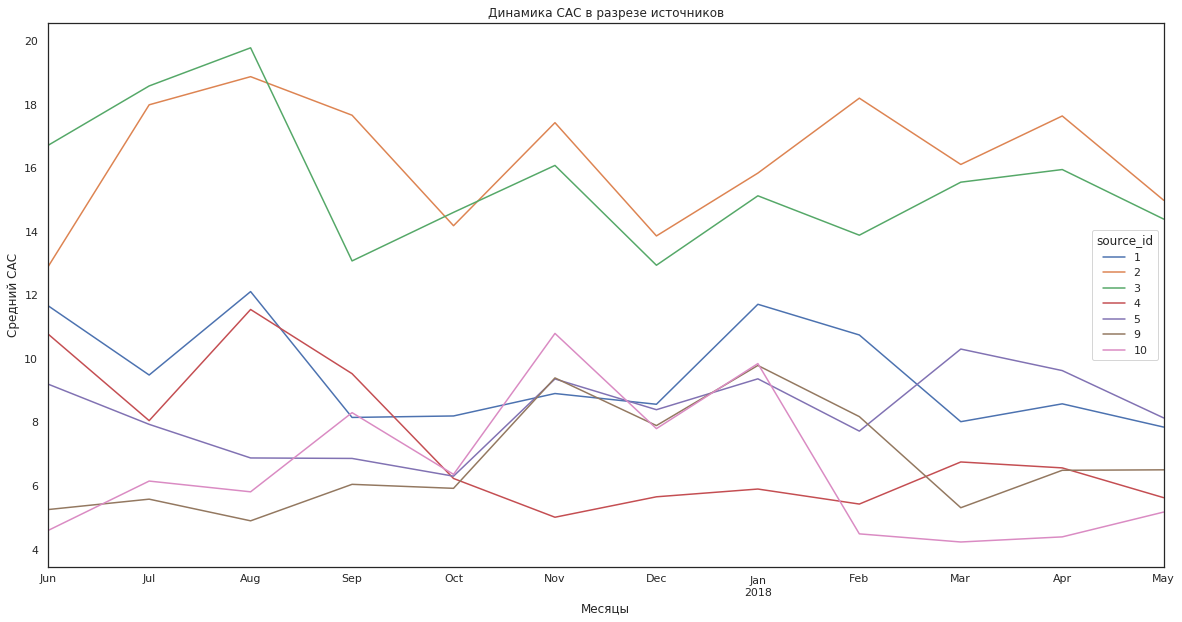

In [56]:
costs_pivot.plot(figsize=(20, 10), title='Динамика САС в разрезе источников')
plt.xlabel('Месяцы')
plt.ylabel('Средний САС')
plt.show()

Итак, мы видим, что в промежутке с октября по январь САС всех источником шёл примерно одинаково ровно. До октяря наблюдались определённые колебания, особенно это видно по источникам 1, 3, 4. После января источники 2 и 3 шли примерно ровно, а вот у источника 10 мы наблюдаем сильно падение. Из имеющихся данных не понятно, с чем это связано.

#### Рассчитаем ROMI по когортам в разрезе источников. Сравним окупаемость за одинаковые периоды жизни когорт. Построим графики, отражающие изменения метрик во времени.

В условии сказано посчитать ROMI в разрезе источников. Повторим код нахождения LTV и CAC, который мы делали ранее, только применительно к каждому источнику.

In [57]:
users1 = visits.sort_values('start_ts').groupby('uid').first()
orders1 = pd.merge(orders, visits)

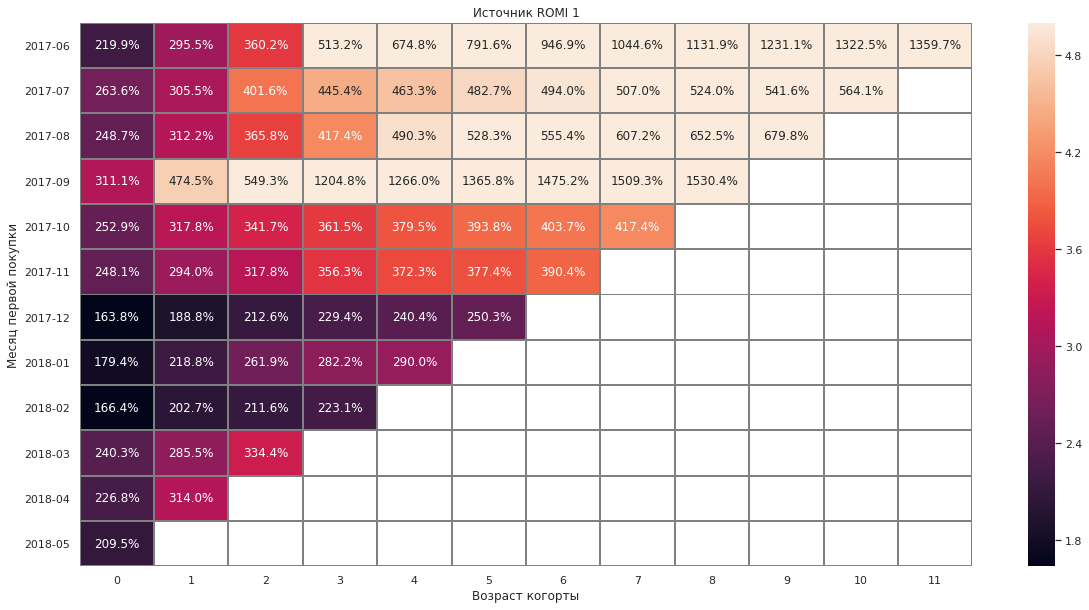

Средний LTV за полгода: 17.43 (Источник 1)
Средний ROMI за полгода: 5.99 (Источник 1)


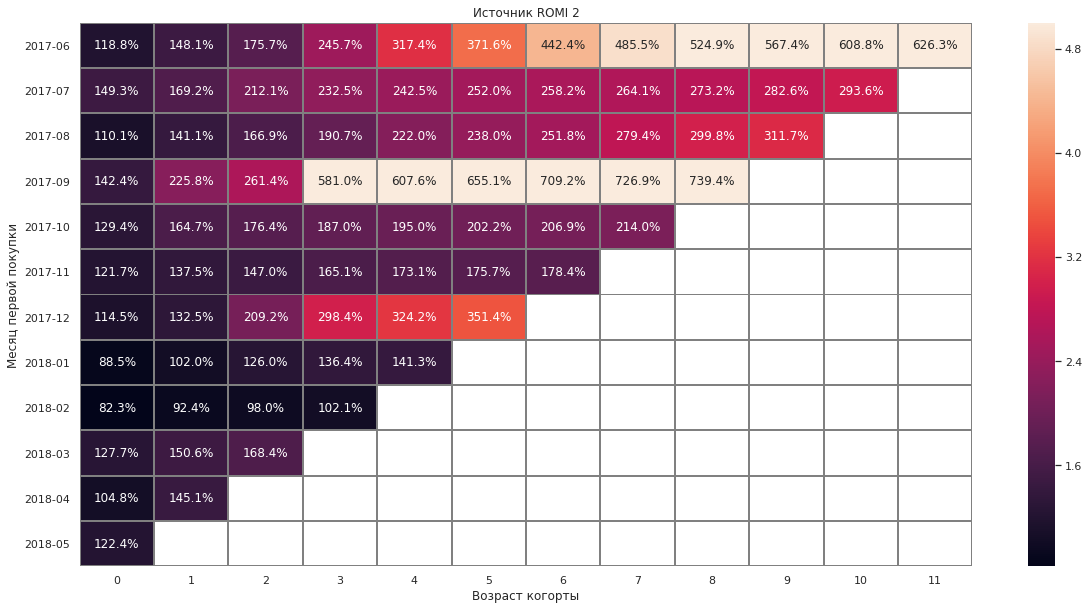

Средний LTV за полгода: 19.14 (Источник 2)
Средний ROMI за полгода: 3.21 (Источник 2)


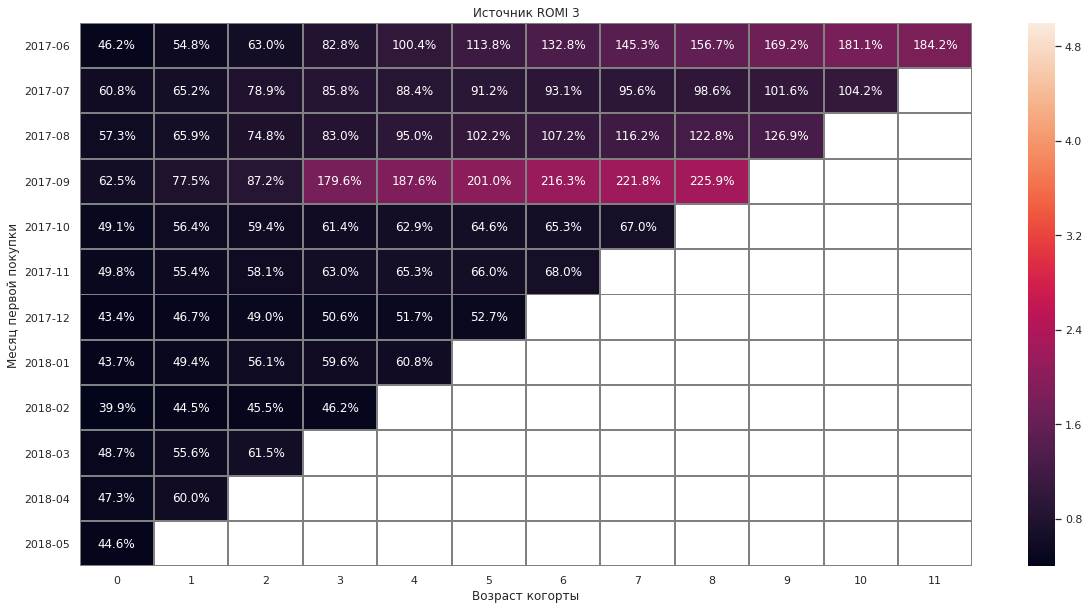

Средний LTV за полгода: 9.86 (Источник 3)
Средний ROMI за полгода: 0.99 (Источник 3)


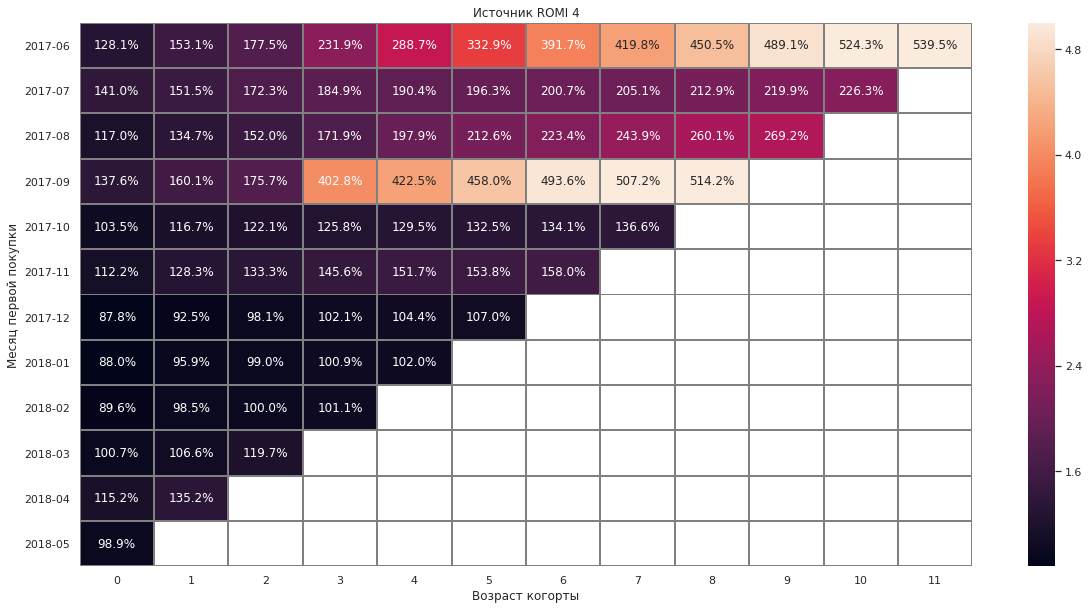

Средний LTV за полгода: 11.0 (Источник 4)
Средний ROMI за полгода: 2.28 (Источник 4)


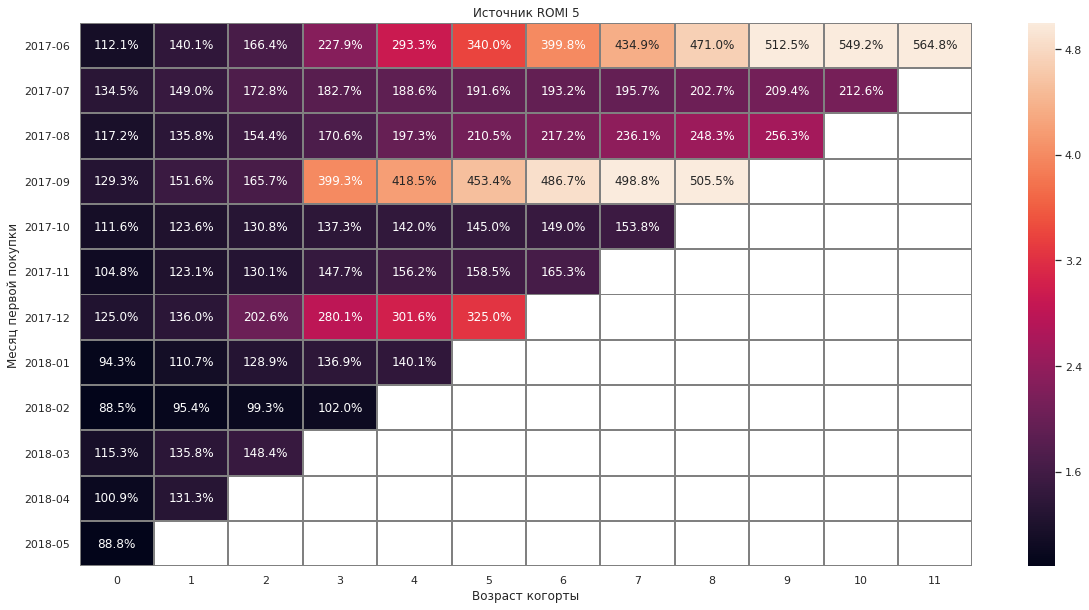

Средний LTV за полгода: 12.71 (Источник 5)
Средний ROMI за полгода: 2.61 (Источник 5)


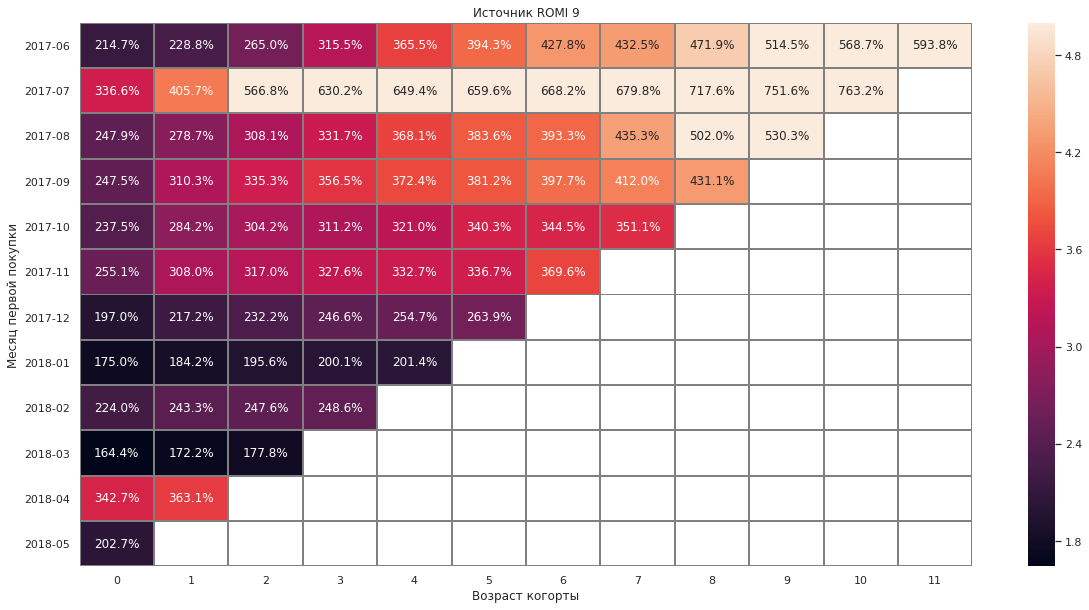

Средний LTV за полгода: 7.0 (Источник 9)
Средний ROMI за полгода: 3.94 (Источник 9)


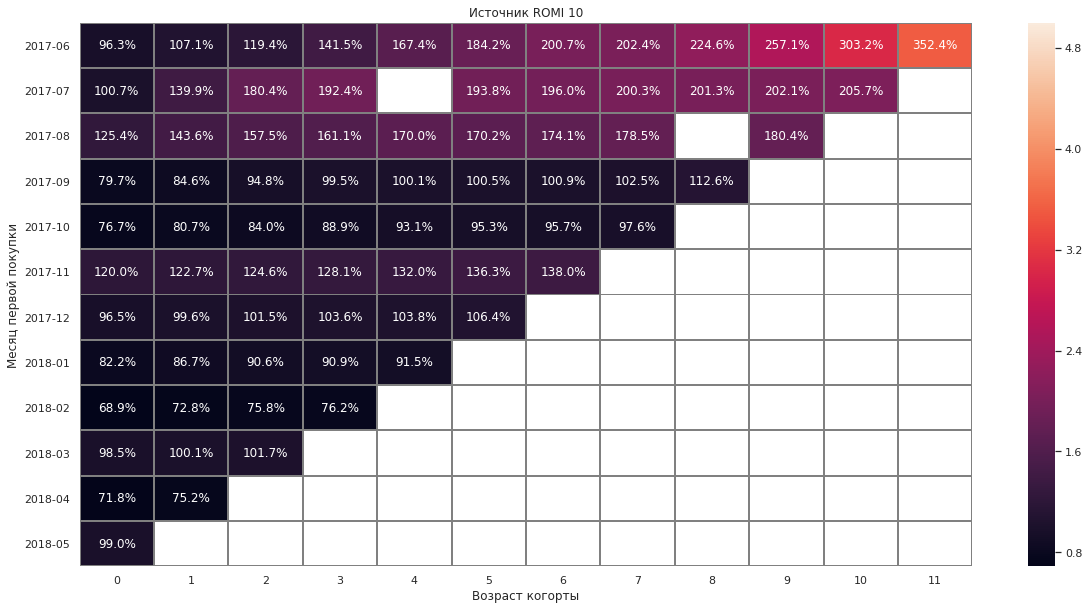

Средний LTV за полгода: 5.0 (Источник 10)
Средний ROMI за полгода: 1.41 (Источник 10)


In [58]:
sourse = costs['source_id'].unique().astype(str)
for i in sourse:    
    orders_romi = orders1.query('source_id == @i')
    first_orders_romi = orders_romi.groupby('uid').agg({'buy_month': 'min'}).reset_index()
    first_orders_romi.columns = ['uid', 'first_order_month']

    cohort_sizes_romi = (
        first_orders_romi.groupby('first_order_month')
        .agg({'uid': 'nunique'})
        .reset_index()
    )
    cohort_sizes_romi.columns = ['first_order_month', 'n_buyers']
    cohort_sizes_romi.head()

    margin_rate = 1

    orders_first_month_romi = pd.merge(orders, first_orders_romi, on='uid')
    cohorts_romi = (
        orders_first_month_romi.groupby(['first_order_month', 'buy_month'])
        .agg({'revenue': 'sum'})
        .reset_index()
    )
    report_romi = pd.merge(cohort_sizes_romi, cohorts_romi, on='first_order_month')

    report_romi['gp'] = report_romi['revenue'] * margin_rate
    report_romi['age'] = (
        report_romi['buy_month'] - report_romi['first_order_month']
    ) / np.timedelta64(1, 'M')
    report_romi['age'] = report_romi['age'].round().astype('int')
    report_romi['ltv'] = report_romi['gp'] / report_romi['n_buyers']
    result_romi = report_romi.pivot_table(
        index='first_order_month', columns='age', values='ltv', aggfunc='mean'
    ).round().cumsum(axis=1)
#cac
    monthly_costs_romi = costs.query('source_id == @i').groupby('costs_month').sum()
    report_new_romi = pd.merge(
        report_romi, monthly_costs_romi, left_on='first_order_month', right_on='costs_month'
    )
    report_new_romi['cac'] = report_new_romi['costs'] / report_new_romi['n_buyers']
    report_new_romi['romi'] = report_new_romi['ltv'] / report_new_romi['cac'].mean()
    report_new_romi['first_order_month'] = report_new_romi['first_order_month'].dt.strftime('%Y-%m')

    output_romi = report_new_romi.pivot_table(
        index='first_order_month', columns='age', values='romi', aggfunc='mean').cumsum(axis=1)
    output_romi
    sns.set(style='white')
    plt.figure(figsize=(20, 10))
    plt.title('Источник ROMI ' + i)
    plt.xlabel('Возраст когорты')
    plt.ylabel('Месяц первой покупки')
    sns.heatmap(output_romi, annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax=5)
    plt.xlabel('Возраст когорты')
    plt.ylabel('Месяц первой покупки')
    plt.show()
    print('Средний LTV за полгода: {} (Источник {})'.format(round(result_romi[5].mean(),2), i))
    print('Средний ROMI за полгода: {} (Источник {})'.format(round(output_romi[5].mean(),2), i))

Во-первых, обращают на себя внимание источники 3 и 10 - их окупаемость ощутимо ниже остальных. 
Во-вторых, привлекает внимание 4-ая когорта в источниках 1-5: с 4-го месяца "жизни" когорты идёт резкое повышение ROMI. Эту "аномалию" мы заметили и раньше, и связали это с предновогодними праздниками и вероятностью того, что именно дя этой гороты была проведена какая-то акция.

## Общий вывод.

Перед нами стояла задача проанализировать данные посещения сайта Яндекс.Афиши, чтобы отказаться от невыгодных источников трафика и перераспределить бюджет.

Мы рассчитали продуктивые метрики, метрики электронной коммерции и маркетинговые метрики. Мы осуществляли когортный анализ, создавали графики и тепловые карты, которые помогли увидеть довольно важные вещи.

Во-первых, разко бросается в глаза, что на втором месяце "жизни" когорт показатель коэффициента удержания резко падает - в среднем он составляет всего 6% от первоначального значения. Это говорит о том, что примерно 94% изначальных пользователей "отваливаются" после первого месяца пользования продуктом. Следует сразу же обратить внимание на это обстоятельство. Может, причина в плохой работе сайта? В неудобной навигации? Или в условиях сервиса (к примеру, высокой комиссии)?

Во-вторых, некоторые источники привлечения клиентов (3 и 10) показывают низкую эффективность. При этом на источник 3 приходится больше трат, чем на прочие источники. Рекомендуется прекратить финансирование этих источников. Источник 1 показывает лучший результат по привлечению, хотя по затратам он на предпоследнем месте (после источников 9 и 10). Рекомендуется увеличить затраты на него.

В-третьих, в источниках с 1 по 5 наблюдается резкое повышение ROMI с 4-го месяца жизни когорты. Вероятно, это связано с предновогодним периодом. Рекомендуется узнать, проводились ли какие-либо акции в этот период, и если да, то проводить их и далее, т.к. они неплохо себя зарекомендовали.

Общие рекомендации: проанализировать, почему большиство клиентов уходит после первого месяца использования. Составить стратегию по их удержанию: различными акциями, бонусами. Вероятно, дело в технической стороне сервиса: к примеру, неудобный интерфейс. Отказаться от 3 и 10 источников привлечения клиентов и увеличить финансирование источника 1.